# Jonathan Halverson
# Friday, March 17, 2017
# Part 8: Effect of reach and height

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [2]:
fights = pd.read_csv('data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv', header=0, parse_dates=['Date'])
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
cols = ['Name', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Reach,LegReach,Stance,Dob,Name_L,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,71.0,41.0,Orthodox,1984-04-24,Holly Holm,68.0,69.0,38.0,Southpaw,1981-10-17
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,77.0,42.0,Southpaw,1975-04-14,Derek Brunson,73.0,77.0,43.0,Southpaw,1984-01-04
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,...,72.0,41.0,Orthodox,1979-12-07,Tim Boetsch,72.0,74.0,42.0,Orthodox,1981-01-28


In [3]:
df['ReachDiff'] = df.Reach - df.Reach_L
df['ReachDiffAbs'] = np.abs(df.Reach - df.Reach_L)

Stack winners on top of losers:

In [4]:
win_ufc = df[['Winner', 'Reach', 'Height', 'LegReach']]
lose_ufc = df[['Loser', 'Reach_L', 'Height_L', 'LegReach_L']]
lose_ufc.columns = win_ufc.columns
win_lose_ufc = win_ufc.append(lose_ufc).drop_duplicates()
win_lose_ufc.columns = ['Name', 'Reach', 'Height', 'LegReach']
win_lose_ufc['Reach2Height'] = win_lose_ufc.Reach / win_lose_ufc.Height
win_lose_ufc.head(3)

,Name,Reach,Height,LegReach,Reach2Height
0,Germaine de Randamie,71.0,69.0,41.0,1.028986
1,Anderson Silva,77.0,74.0,42.0,1.040541
2,Jacare Souza,72.0,73.0,41.0,0.986301


In [5]:
win_lose_ufc.sort_values('Reach', ascending=False).head(3)

,Name,Reach,Height,LegReach,Reach2Height
3781,Semmy Schilt,88.0,82.0,NaN,1.073171
3512,Dan Christison,85.0,80.0,NaN,1.062500
170,Stefan Struve,84.0,84.0,48.0,1.000000


In [6]:
win_lose_ufc.shape[0]

1641

In [7]:
tmp = win_lose_ufc[['Reach', 'Height']].dropna()
tmp.shape[0], tmp.shape[0] / 1641.

(1210, 0.7373552711761121)

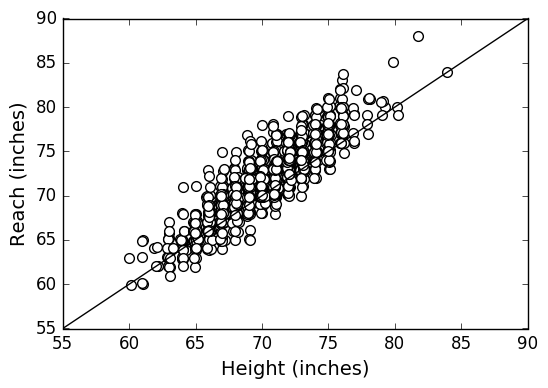

In [8]:
from scipy.stats import norm

dx = norm.rvs(loc=0.0, scale=0.1, size=pd.notnull(win_lose_ufc.Height).size)
dy = norm.rvs(loc=0.0, scale=0.1, size=pd.notnull(win_lose_ufc.Reach).size)

plt.plot(win_lose_ufc.Height + dx, win_lose_ufc.Reach + dy, 'wo')
plt.plot([55, 90], [55, 90], 'k-')
plt.xlabel('Height (inches)')
plt.ylabel('Reach (inches)')
plt.savefig('report/reach_height/height_reach_all_fighters.pdf', bbox_tight='inches')

In [9]:
from scipy.stats import pearsonr, spearmanr

hr = win_lose_ufc[['Height', 'Reach']].dropna()
corr_pearson, p_value_pearson = pearsonr(hr.Height, hr.Reach)
corr_spearman, p_value_spearman = spearmanr(hr.Height, hr.Reach)
print corr_pearson, p_value_pearson
print corr_spearman, p_value_spearman

0.886190693375 0.0
0.874188275885 0.0


(30, 50)

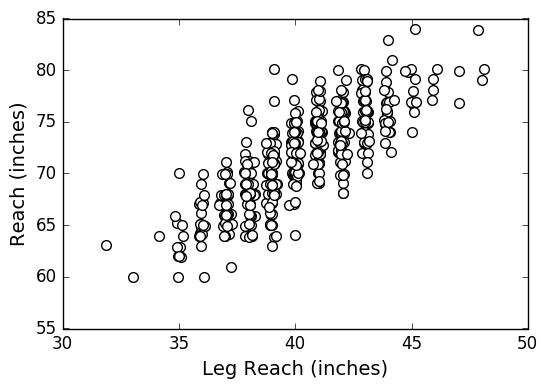

In [10]:
tmp = win_lose_ufc[['Reach', 'LegReach']].dropna()

dx = norm.rvs(loc=0.0, scale=0.1, size=tmp.LegReach.size)
dy = norm.rvs(loc=0.0, scale=0.1, size=tmp.Reach.size)

plt.plot(tmp.LegReach + dx, tmp.Reach + dy, 'wo')
#plt.plot([55, 90], [55, 90], 'k-')
plt.xlabel('Leg Reach (inches)')
plt.ylabel('Reach (inches)')
plt.xlim(30, 50)
#plt.savefig('report/reach_height/leg_reach_all_fighters.pdf', bbox_tight='inches')

In [11]:
corr_pearson, p_value_pearson = pearsonr(tmp.LegReach, tmp.Reach)
corr_spearman, p_value_spearman = spearmanr(tmp.LegReach, tmp.Reach)
print corr_pearson, p_value_pearson
print corr_spearman, p_value_spearman

0.817758018316 6.10544462072e-137
0.819814357844 3.44961728566e-138


In [12]:
above9 = df.sort_values(['ReachDiffAbs', 'Date'], ascending=False)
above9 = above9[['Winner', 'Reach', 'Outcome', 'Loser', 'Reach_L', 'ReachDiffAbs', 'Date']][above9.ReachDiffAbs >= 9]
win_count = above9[above9.Reach > above9.Reach_L].shape[0]
above9 = above9.astype({'Reach':int, 'Reach_L':int, 'ReachDiffAbs':int})
above9.index = range(1, above9.shape[0] + 1)
above9.columns = ['Winner', 'Reach', 'Outcome', 'Loser', 'Reach', r'$\Delta$', 'Date']
above9.to_latex('report/reach_height/biggest_reach_diff_RAW.tex')
above9

,Winner,Reach,Outcome,Loser,Reach,$\Delta$,Date
1,Miguel Torres,76,def.,Antonio Banuelos,63,13,2011-02-05
2,Jon Jones,84,def.,Daniel Cormier,72,12,2015-01-03
3,Mark Hunt,72,def.,Stefan Struve,84,12,2013-03-02
4,Demetrious Johnson,64,def.,Miguel Torres,76,12,2011-05-28
5,Roy Nelson,72,def.,Stefan Struve,84,12,2010-03-31
6,Neil Magny,80,def.,Johny Hendricks,69,11,2016-12-30
7,Dan Hooker,75,def.,Ian Entwistle,64,11,2014-06-28
8,Jon Jones,84,def.,Rampage Jackson,73,11,2011-09-24
9,Dale Hartt,69,def.,Corey Hill,80,11,2008-12-10
10,Stefan Struve,84,def.,Daniel Omielanczuk,74,10,2016-10-08


In [13]:
cols = ['Name', 'Reach', 'Height', 'Reach2Height']
raw_reach = win_lose_ufc.sort_values(['Reach2Height'], ascending=False).reset_index(drop=True)[cols]
raw_reach = raw_reach[raw_reach.Reach2Height >= 1.08]
raw_reach = raw_reach.astype({'Reach':int, 'Height':int})
raw_reach.index = range(1, raw_reach.shape[0] + 1)
raw_reach.Reach2Height = raw_reach.Reach2Height.apply(lambda x: round(x, 2))
raw_reach.columns = ['Name', 'Reach', 'Height', 'Reach/Height']
raw_reach

,Name,Reach,Height,Reach/Height
1,Rodrigo de Lima,75,67,1.12
2,Kevin Lee,77,69,1.12
3,Rameau Thierry Sokoudjou,78,70,1.11
4,Marcus Brimage,71,64,1.11
5,Taylor Lapilus,73,66,1.11
6,Jon Jones,84,76,1.11
7,Mark Bocek,75,68,1.10
8,Miguel Torres,76,69,1.10
9,Paul Daley,76,69,1.10
10,Caros Fodor,76,69,1.10


In [14]:
cols = ['Name', 'Reach', 'Height', 'Reach2Height']
sm_reach = win_lose_ufc.sort_values(['Reach2Height'], ascending=True).reset_index(drop=True)[cols]
sm_reach = sm_reach[sm_reach.Reach2Height <= 0.98]
sm_reach = sm_reach.astype({'Reach':int, 'Height':int})
sm_reach.index = range(1, sm_reach.shape[0] + 1)
sm_reach.Reach2Height = sm_reach.Reach2Height.apply(lambda x: round(x, 2))
sm_reach.columns = ['Name', 'Reach', 'Height', 'Reach/Height']
sm_reach = sm_reach.loc[1:35]

# join the two tables
cmb = raw_reach.merge(sm_reach, left_index=True, right_index=True)
cmb.columns = ['Name', 'Reach', 'Height', 'Reach2Height', 'Name', 'Reach', 'Height', 'Reach2Height']
cmb.to_latex('report/reach_height/reach2height_large_RAW.tex')
cmb

,Name,Reach,Height,Reach2Height,Name,Reach,Height,Reach2Height
1,Rodrigo de Lima,75,67,1.12,Bernardo Magalhaes,65,69,0.94
2,Kevin Lee,77,69,1.12,Artem Lobov,65,69,0.94
3,Rameau Thierry Sokoudjou,78,70,1.11,Sheila Gaff,62,65,0.95
4,Marcus Brimage,71,64,1.11,Jocelyn Jones-Lybarger,64,67,0.96
5,Taylor Lapilus,73,66,1.11,Cody Garbrandt,65,68,0.96
6,Jon Jones,84,76,1.11,Leslie Smith,66,69,0.96
7,Mark Bocek,75,68,1.10,Chris Lytle,68,71,0.96
8,Miguel Torres,76,69,1.10,Peggy Morgan,70,73,0.96
9,Paul Daley,76,69,1.10,Milana Dudieva,61,63,0.97
10,Caros Fodor,76,69,1.10,Lisa Ellis,62,64,0.97


In [15]:
win_count

31

### Reach2Height vs win ratio

In [16]:
df05 = df[(df.Date > pd.to_datetime('2005-01-01'))]

In [17]:
df05[df05.Loser == 'Naoyuki Kotani']

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Stance,Dob,Name_L,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L,ReachDiff,ReachDiffAbs
666,Kajan Johnson,def.,Naoyuki Kotani,Lightweight,U-DEC,NaN,3,5:00,UFC Fight Night: Barnett vs Nelson,2015-09-26,...,Orthodox,1984-04-21,Naoyuki Kotani,68.0,66.0,NaN,Southpaw,1981-12-08,9.0,9.0
1108,Yan Cabral,def.,Naoyuki Kotani,Lightweight,SUB,Rear Naked Choke,2,3:06,UFC 179: Aldo vs Mendes 2,2014-10-25,...,Orthodox,1983-05-13,Naoyuki Kotani,68.0,66.0,NaN,Southpaw,1981-12-08,7.0,7.0
1233,Norman Parke,def.,Naoyuki Kotani,Lightweight,KO/TKO,Punches,2,3:41,UFC Fight Night: McGregor vs Brandao,2014-07-19,...,NaN,1986-12-22,Naoyuki Kotani,68.0,66.0,NaN,Southpaw,1981-12-08,4.0,4.0
3273,Dennis Siver,def.,Naoyuki Kotani,Lightweight,KO/TKO,Punch,2,2:04,UFC 75: Champion vs Champion,2007-09-08,...,Orthodox,1979-01-13,Naoyuki Kotani,68.0,66.0,NaN,Southpaw,1981-12-08,4.0,4.0
3355,Thiago Tavares,def.,Naoyuki Kotani,Lightweight,U-DEC,NaN,3,5:00,UFC Fight Night: Stevenson vs Guillard,2007-04-05,...,Orthodox,1984-11-08,Naoyuki Kotani,68.0,66.0,NaN,Southpaw,1981-12-08,2.0,2.0


In [18]:
fighter_winratio = []
for fighter in df05.Winner.append(df05.Loser).unique():
     wins = df05[(df05.Winner == fighter) & (df05.Outcome == 'def.')].shape[0]
     loses = df05[(df05.Loser == fighter) & (df05.Outcome == 'def.')].shape[0]
     draws = df05[((df05.Winner == fighter) | (df05.Loser == fighter)) & (df05.Outcome == 'draw')].shape[0]
     total_fights = wins + loses + draws
     if total_fights > 4: fighter_winratio.append((fighter, (wins + 0.5 * draws) / total_fights))

In [19]:
fighter_winratio = pd.DataFrame(fighter_winratio, columns=['Name', 'WinRatio'])
fighter_winratio.head(3)

,Name,WinRatio
0,Germaine de Randamie,0.800000
1,Anderson Silva,0.809524
2,Jacare Souza,0.875000


In [20]:
win_reach_ratios = fighter_winratio.merge(win_lose_ufc, on='Name', how='left')
win_reach_ratios = win_reach_ratios[pd.notnull(win_reach_ratios.Reach2Height)][['Name', 'WinRatio', 'Reach2Height']]
win_reach_ratios.head(3)

,Name,WinRatio,Reach2Height
0,Germaine de Randamie,0.800000,1.028986
1,Anderson Silva,0.809524,1.040541
2,Jacare Souza,0.875000,0.986301


In [21]:
fighter_winratio[fighter_winratio.WinRatio < 0.1]

,Name,WinRatio
553,Naoyuki Kotani,0.0
554,Pat Healy,0.0


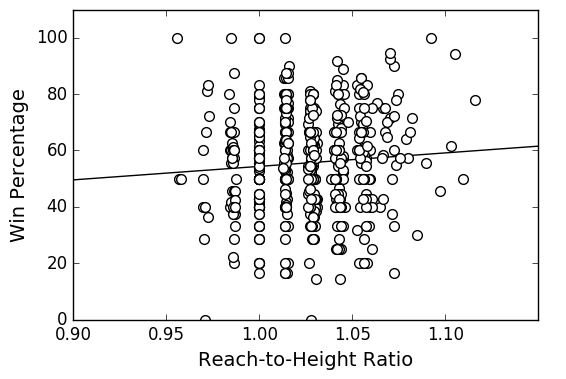

In [22]:
m, b = np.polyfit(win_reach_ratios.Reach2Height, 100 * win_reach_ratios.WinRatio, 1)
plt.plot(np.linspace(0.9, 1.15), m * np.linspace(0.9, 1.15) + b, 'k-')
plt.plot(win_reach_ratios.Reach2Height, 100 * win_reach_ratios.WinRatio, 'wo')
plt.xlabel('Reach-to-Height Ratio')
plt.ylabel('Win Percentage')
plt.xlim(0.9, 1.15)
plt.ylim(0, 110)
plt.savefig('report/reach_height/reach_vs_win_percent.pdf', bbox_tight='inches')

In [23]:
corr_pearson, p_value_pearson = pearsonr(win_reach_ratios.Reach2Height, win_reach_ratios.WinRatio)
corr_spearman, p_value_spearman = spearmanr(win_reach_ratios.Reach2Height, win_reach_ratios.WinRatio)
print corr_pearson, p_value_pearson
print corr_spearman, p_value_spearman

0.0712913573477 0.0939691198519
0.052051236691 0.221672368197


### Jones vs other LHW

In [24]:
win_jones = df[['Winner', 'Reach', 'Height', 'WeightClass']]
lose_jones = df[['Loser', 'Reach_L', 'Height_L', 'WeightClass']]
lose_jones.columns = win_jones.columns
win_lose_jones = win_jones.append(lose_jones).drop_duplicates()
win_lose_jones = win_lose_jones[win_lose_jones.WeightClass == 'Light Heavyweight']
win_lose_jones.head(3)

,Winner,Reach,Height,WeightClass
3,Glover Teixeira,76.0,74.0,Light Heavyweight
13,Volkan Oezdemir,75.0,73.0,Light Heavyweight
21,Khalil Rountree Jr.,74.0,73.0,Light Heavyweight


In [25]:
win_lose_jones.shape[0]

189

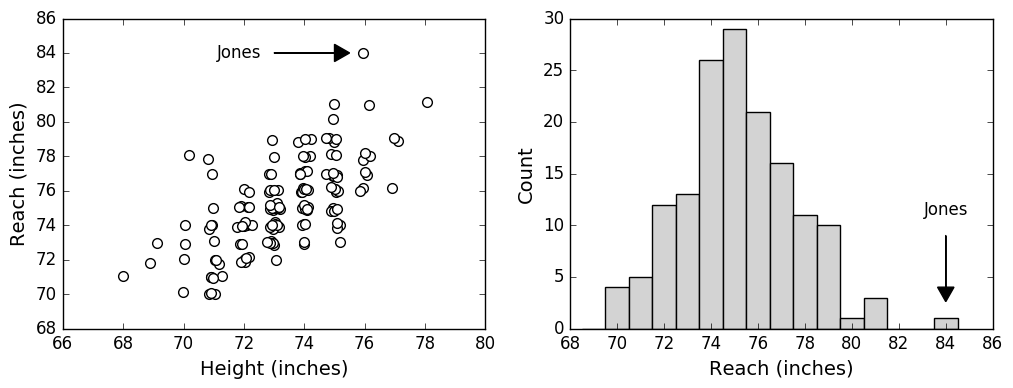

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

dx = norm.rvs(loc=0.0, scale=0.1, size=pd.notnull(win_lose_jones.Height).size)
dy = norm.rvs(loc=0.0, scale=0.1, size=pd.notnull(win_lose_jones.Reach).size)

ax1.plot(win_lose_jones.Height + dx, win_lose_jones.Reach + dy, 'wo')
ax1.set_xlim(66, 80)
ax1.set_ylim(68, 86)
ax1.arrow(73, 84, 2.0, 0, head_width=1, head_length=0.5, fc='k', ec='k')
ax1.text(71.1, 84, 'Jones', fontsize=12, va='center')
ax1.set_xlabel('Height (inches)')
ax1.set_ylabel('Reach (inches)')

_, _, patches = ax2.hist(win_lose_jones[pd.notnull(win_lose_jones.Reach)].Reach, bins=np.arange(68.5, 85.5, 1), color='lightgray')
patches[0].set_snap(True)
ax2.arrow(84, 9, 0, -5, head_width=0.7, head_length=1.4, fc='k', ec='k')
ax2.text(84, 11, 'Jones', fontsize=12, ha='center')
ax2.set_xlabel('Reach (inches)')
ax2.set_ylabel('Count')
#plt.tight_layout()
fig.savefig('report/reach_height/jones_reach.pdf', bbox_inches='tight')

### End tables. Now create figures beginning with win ratio vs reach differential

In [27]:
df = df[(df.Date > pd.to_datetime('2005-01-01')) & (df.Outcome == 'def.')]

In [28]:
by_diff = df.ReachDiff.apply(lambda x: round(x)).value_counts().sort_index()
by_diff

-12.0      3
-11.0      1
-10.0      4
-9.0       5
-8.0      22
-7.0      39
-6.0      73
-5.0     112
-4.0     160
-3.0     218
-2.0     317
-1.0     410
 0.0     423
 1.0     371
 2.0     326
 3.0     278
 4.0     195
 5.0     128
 6.0      92
 7.0      49
 8.0      29
 9.0      13
 10.0     13
 11.0      3
 12.0      1
 13.0      1
Name: ReachDiff, dtype: int64

In [29]:
by_diff_abs = df.ReachDiffAbs.apply(lambda x: round(x)).value_counts().sort_index()
by_diff_abs

0.0     423
1.0     781
2.0     643
3.0     496
4.0     355
5.0     240
6.0     165
7.0      88
8.0      51
9.0      18
10.0     17
11.0      4
12.0      4
13.0      1
Name: ReachDiffAbs, dtype: int64

In [30]:
from scipy.stats import t, norm

rdf = pd.DataFrame({'N':by_diff_abs.loc[1:10], 'Wins':by_diff.loc[1:10], 'WinRatio':by_diff.loc[1:10] / by_diff_abs.loc[1:10]})
rdf['Loses'] = rdf.N - rdf.Wins
rdf['2se_t'] = -t.ppf(0.025, rdf.N - 1) * np.sqrt(rdf.WinRatio * (1.0 - rdf.WinRatio) / rdf.N)
rdf['2se_z'] = -norm.ppf(0.025) * np.sqrt(rdf.WinRatio * (1.0 - rdf.WinRatio) / rdf.N)
rdf

,N,WinRatio,Wins,Loses,2se_t,2se_z
1.0,781,0.475032,371,410,0.035077,0.035023
2.0,643,0.506998,326,317,0.038716,0.038643
3.0,496,0.560484,278,218,0.043786,0.043679
4.0,355,0.549296,195,160,0.051936,0.051759
5.0,240,0.533333,128,112,0.063438,0.063117
6.0,165,0.557576,92,73,0.076347,0.075784
7.0,88,0.556818,49,39,0.105254,0.103790
8.0,51,0.568627,29,22,0.139296,0.135926
9.0,18,0.722222,13,5,0.222737,0.206917
10.0,17,0.764706,13,4,0.218095,0.201640


In [31]:
cont_table = rdf[['Wins', 'Loses']].T
cont_table

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Wins,371,326,278,195,128,92,49,29,13,13
Loses,410,317,218,160,112,73,39,22,5,4


In [32]:
from scipy.stats import chi2_contingency

chi_sq, p_value, dof, expect = chi2_contingency(cont_table)
print chi_sq, p_value, p_value > 0.05

20.2072240779 0.0166757390866 False


In [33]:
N = cont_table.sum().sum()
V = (chi_sq / (N * min(cont_table.shape[0] - 1, cont_table.shape[1] - 1)))**0.5
V

0.084144618221939541

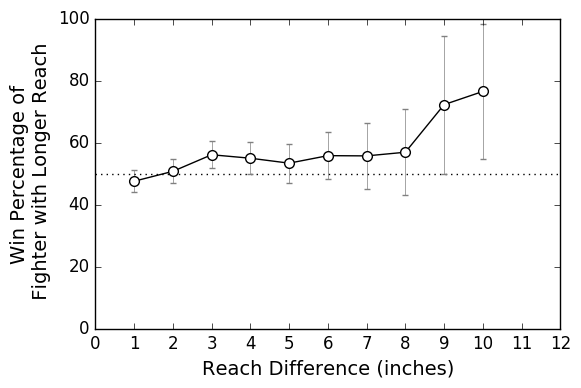

In [34]:
fig, ax = plt.subplots()
plt.plot([0, 25], [50, 50], 'k:')
plt.errorbar(rdf.index, 100 * rdf.WinRatio, color='k', marker='o', mfc='w', yerr=100*rdf['2se_t'], ecolor='gray', elinewidth=0.5, capsize=2)
plt.xlabel('Reach Difference (inches)')
plt.ylabel('Win Percentage of\n Fighter with Longer Reach')
plt.xlim(0, 12)
plt.ylim(0, 100)
major_ticks = np.arange(0, 13, 1)
ax.set_xticks(major_ticks)
#minor_ticks = np.arange(0, 25, 1)
#ax.set_xticks(minor_ticks, minor = True)
plt.savefig('report/reach_height/winratio_reach_diff.pdf', bbox_inches='tight')